In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
sns.set()
from matplotlib import pyplot as plt
import os
sensors_df = pd.read_csv("sensor_locations.csv")
december_df = pd.read_csv("december-2017.csv")

In [16]:
# print(december_df.columns.values)
numbers=set()
for value in december_df.columns.values[1:]:
    num=int(value.split('_')[0])
    numbers.add(num)
numbers=sorted(numbers)
print(numbers)
december_df.shape

[3, 140, 142, 147, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 189, 192, 194, 195, 196, 201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 263, 622, 713, 808, 857, 895]


(577, 337)

In [17]:
df_140 = december_df[['UTC time', '140_temperature', '140_humidity', '140_pressure', '140_pm1', '140_pm10', '140_pm25']].truncate(before=0, after=23)
df_140

,UTC time,140_temperature,140_humidity,140_pressure,140_pm1,140_pm10,140_pm25
0,2017-12-01T00:00:00,0,96,100542,39,68,38
1,2017-12-01T01:00:00,0,96,100625,37,62,36
2,2017-12-01T02:00:00,0,95,100695,34,53,31
3,2017-12-01T03:00:00,0,92,100748,31,45,26
4,2017-12-01T04:00:00,0,89,100854,29,43,25
5,2017-12-01T05:00:00,0,89,100938,28,40,23
6,2017-12-01T06:00:00,0,89,101028,38,61,35
7,2017-12-01T07:00:00,0,89,101110,42,72,40
8,2017-12-01T08:00:00,0,86,101174,44,78,43
9,2017-12-01T09:00:00,1,89,101245,45,81,45


In [18]:
df_140['UTC time']=df_140['UTC time'].apply(lambda x: int(x[11:13]))
df_140

,UTC time,140_temperature,140_humidity,140_pressure,140_pm1,140_pm10,140_pm25
0,0,0,96,100542,39,68,38
1,1,0,96,100625,37,62,36
2,2,0,95,100695,34,53,31
3,3,0,92,100748,31,45,26
4,4,0,89,100854,29,43,25
5,5,0,89,100938,28,40,23
6,6,0,89,101028,38,61,35
7,7,0,89,101110,42,72,40
8,8,0,86,101174,44,78,43
9,9,1,89,101245,45,81,45


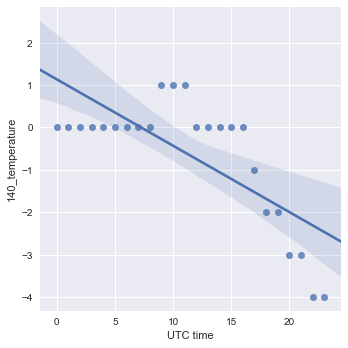

In [19]:
sns.lmplot(x='UTC time', y='140_temperature', data=df_140)
plt.show()

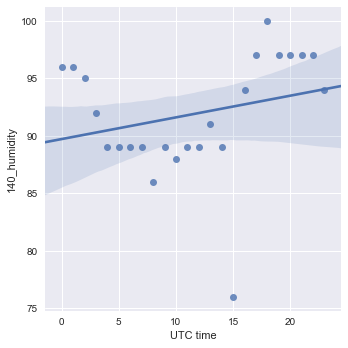

In [20]:
sns.lmplot(x='UTC time', y='140_humidity', data=df_140)
plt.show()

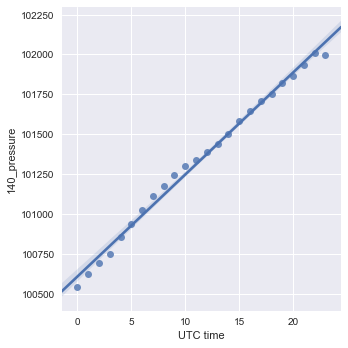

In [21]:
sns.lmplot(x='UTC time', y='140_pressure', data=df_140)
plt.show()

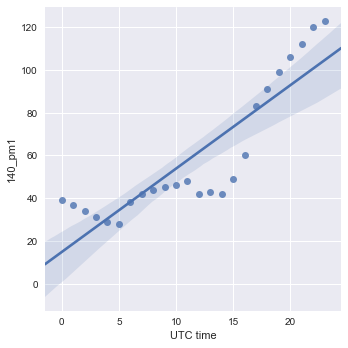

In [22]:
sns.lmplot(x='UTC time', y='140_pm1', data=df_140)
plt.show()

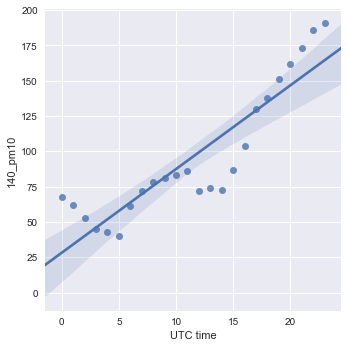

In [23]:
sns.lmplot(x='UTC time', y='140_pm10', data=df_140)
plt.show()

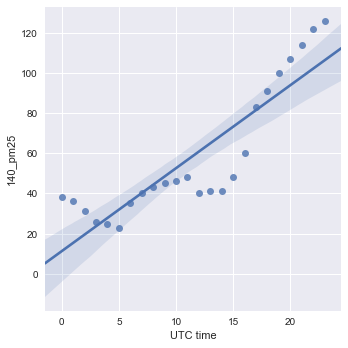

In [24]:
sns.lmplot(x='UTC time', y='140_pm25', data=df_140)
plt.show()

In [25]:
means=pd.DataFrame()
meanss = []
for idx,number in enumerate(numbers):
    sensor_df=december_df.iloc[:,(1+6*idx):(7+6*idx)]
    # row_df=pd.DataFrame(0, columns=['sensor_id', 'temperature', 'humidity', 'pressure', 'pm1', 'pm10', 'pm25'])
    print(sensor_df)
    # meanss.append(ro)
    # row_df.insert(idx,'sensor_id',number)
#     for param in sensor_df.columns.values:
#         row_df.insert(idx+1,param.split('_')[1],sensor_df[param].mean())
#     print(row_df)
# print(means.head)

     3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  3_pm10
0              NaN         NaN         NaN    NaN     NaN     NaN
1              NaN         NaN         NaN    NaN     NaN     NaN
2              NaN         NaN         NaN    NaN     NaN     NaN
3              NaN         NaN         NaN    NaN     NaN     NaN
4              NaN         NaN         NaN    NaN     NaN     NaN
5              NaN         NaN         NaN    NaN     NaN     NaN
6              NaN         NaN         NaN    NaN     NaN     NaN
7              NaN         NaN         NaN    NaN     NaN     NaN
8              NaN         NaN         NaN    NaN     NaN     NaN
9              NaN         NaN         NaN    NaN     NaN     NaN
10             NaN         NaN         NaN    NaN     NaN     NaN
11             NaN         NaN         NaN    NaN     NaN     NaN
12             NaN         NaN         NaN    NaN     NaN     NaN
13             NaN         NaN         NaN    NaN     NaN     NaN
14        

     171_temperature  171_humidity  171_pressure  171_pm1  171_pm25  171_pm10
0                  0            96        100531       32        30        52
1                  0            96        100615       31        30        51
2                  0            96        100689       28        26        43
3                  0            92        100748       24        21        35
4                  1            89        100846       24        20        34
5                  1            89        100933       20        17        29
6                  1            89        101012       25        22        36
7                  1            89        101098       31        29        48
8                  1            93        101167       33        31        53
9                  1            89        101230       29        26        45
10                 1            97        101277       33        32        54
11                 1            89        101326       37       

[577 rows x 6 columns]
     180_temperature  180_humidity  180_pressure  180_pm1  180_pm25  180_pm10
0                  0            97        100679       25        22        37
1                  0            96        100728       21        18        31
2                  0            95        100810       18        15        26
3                  0            92        100880       15        12        22
4                  0            89        100979       15        13        22
5                  0            89        101056       17        14        23
6                  0            89        101120       24        21        35
7                  1            89        101203       29        27        46
8                  0            86        101272       33        31        54
9                  1            89        101340       35        33        56
10                 1            88        101382       35        34        59
11                 1            89       

     205_temperature  205_humidity  205_pressure  205_pm1  205_pm25  205_pm10
0                NaN           NaN           NaN      NaN       NaN       NaN
1                NaN           NaN           NaN      NaN       NaN       NaN
2                NaN           NaN           NaN      NaN       NaN       NaN
3                NaN           NaN           NaN      NaN       NaN       NaN
4                NaN           NaN           NaN      NaN       NaN       NaN
5                NaN           NaN           NaN      NaN       NaN       NaN
6                NaN           NaN           NaN      NaN       NaN       NaN
7                NaN           NaN           NaN      NaN       NaN       NaN
8                NaN           NaN           NaN      NaN       NaN       NaN
9                NaN           NaN           NaN      NaN       NaN       NaN
10               NaN           NaN           NaN      NaN       NaN       NaN
11               NaN           NaN           NaN      NaN       

In [26]:
ms = december_df.mean()
means = pd.DataFrame([], columns=['sensor_id', 'temperature', 'humidity', 'pressure', 'pm1', 'pm10', 'pm25'])

In [27]:
ms.index[0].split('_')[0]

'3'

In [28]:
means = pd.DataFrame({ms.index[i*6].split('_')[0]: list(ms[i*6:i*6+6]) for i in range(int(ms.shape[0]/6))}).T
means.columns = ['temperature', 'humidity', 'pressure', 'pm1', 'pm10', 'pm25']

In [29]:
means.head()

,temperature,humidity,pressure,pm1,pm10,pm25
140,1.570191,89.218371,101567.694974,36.632582,39.072790,67.102253
142,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN
169,-4.857868,70.134518,101089.467005,24.949239,25.332487,40.593909
170,1.591800,56.235294,101533.909091,31.023173,34.793226,53.909091


In [30]:
sensors_loc = pd.read_csv("sensor_locations.csv").set_index('id')
sensors_loc.head()

,latitude,longitude
id,,
3,50.057748,19.961375
140,50.057747,19.961374
142,50.084816,19.878066
147,50.048924,19.962262
169,50.048699,20.101569


In [31]:
means.index = means.index.astype('int')

In [32]:
data = means.join(sensors_loc)

In [33]:
data.to_csv('sensors_december_average.csv')

In [34]:
data


,temperature,humidity,pressure,pm1,pm10,pm25,latitude,longitude
140,1.570191,89.218371,101567.694974,36.632582,39.072790,67.102253,50.057747,19.961374
142,NaN,NaN,NaN,NaN,NaN,NaN,50.084816,19.878066
147,NaN,NaN,NaN,NaN,NaN,NaN,50.048924,19.962262
169,-4.857868,70.134518,101089.467005,24.949239,25.332487,40.593909,50.048699,20.101569
170,1.591800,56.235294,101533.909091,31.023173,34.793226,53.909091,50.077467,19.895577
171,1.417678,85.693241,101545.689775,32.537262,35.916811,56.802426,50.084134,19.968416
172,1.887129,55.570297,101477.954455,29.376238,34.039604,54.396040,50.073094,19.886750
173,1.076256,86.459272,101532.194107,29.112652,33.060659,52.376083,50.057537,19.897547
174,1.007722,83.934363,101405.355212,33.494208,32.455598,52.223938,50.057242,19.914874
176,1.521664,86.755633,101617.110919,30.270364,33.175043,58.237435,50.044067,19.998804
